# Machine Learning

[A Practical Guide to Machine Learning with TensorFlow 2.0 & Keras by Vadim Karpusenko](https://frontendmasters.com/courses/practical-machine-learning/)

## Linear Regression

In [262]:
import tensorflow as tf

tf.random.uniform.__doc__

'Outputs random values from a uniform distribution.\n\n  The generated values follow a uniform distribution in the range\n  `[minval, maxval)`. The lower bound `minval` is included in the range, while\n  the upper bound `maxval` is excluded.\n\n  For floats, the default range is `[0, 1)`.  For ints, at least `maxval` must\n  be specified explicitly.\n\n  In the integer case, the random integers are slightly biased unless\n  `maxval - minval` is an exact power of two.  The bias is small for values of\n  `maxval - minval` significantly smaller than the range of the output (either\n  `2**32` or `2**64`).\n\n  Examples:\n\n  >>> tf.random.uniform(shape=[2])\n  <tf.Tensor: shape=(2,), dtype=float32, numpy=array([..., ...], dtype=float32)>\n  >>> tf.random.uniform(shape=[], minval=-1., maxval=0.)\n  <tf.Tensor: shape=(), dtype=float32, numpy=-...>\n  >>> tf.random.uniform(shape=[], minval=5, maxval=10, dtype=tf.int64)\n  <tf.Tensor: shape=(), dtype=int64, numpy=...>\n\n  The `seed` argument 

A Tensor is an Array/ Matrix.

In [263]:
tf.random.uniform([1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.29859698], dtype=float32)>

Transform a Tensor representation into a `numpy` representation

In [264]:
var = tf.random.uniform([1])
print(var.numpy())

[0.09848642]


Tensorflow is trying to optimise the utilisation of the hardware. Tensorflow keeps track of operations and how they're running on the GPU. Helping the most compute intesive parts - using pre built libraries for these operations instead.

Let's create some noisy data

In [265]:
def make_noisy_data(w=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)
    y = w * x + b + noise
    return x, y


In [266]:
X, Y = make_noisy_data()

In [267]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.9027567 , 0.62425065, 0.8201971 , 0.527208  , 0.41396534,
       0.82758033, 0.5288365 , 0.38327825, 0.09709716, 0.23363328,
       0.50896263, 0.7590194 , 0.17011964, 0.8988272 , 0.3283522 ,
       0.88666594, 0.86446285, 0.01178074, 0.8989016 , 0.93807924,
       0.6083591 , 0.36750627, 0.79622936, 0.55519485, 0.11650658,
       0.65157723, 0.28890097, 0.9825233 , 0.88861144, 0.68831944,
       0.5839045 , 0.6038773 , 0.46507502, 0.9178356 , 0.3605219 ,
       0.9921415 , 0.23289573, 0.84461486, 0.7918731 , 0.41578424,
       0.57682455, 0.13426352, 0.4847386 , 0.68105924, 0.7355908 ,
       0.8982395 , 0.11177492, 0.5470071 , 0.12767065, 0.636551  ,
       0.85398936, 0.5885891 , 0.9522811 , 0.55156076, 0.5483254 ,
       0.47479093, 0.7585926 , 0.7068069 , 0.13496864, 0.9430704 ,
       0.16023445, 0.00137722, 0.85881364, 0.74494696, 0.21477783,
       0.9410325 , 0.03414536, 0.11404002, 0.69787264, 0.83131003,
       0.88020

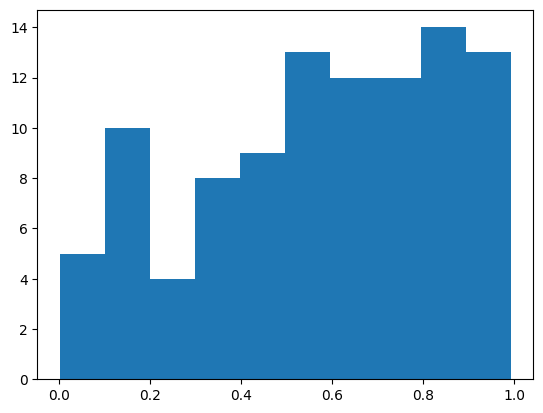

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(X)
plt.show()

The distribution is more or less equal (uniform)

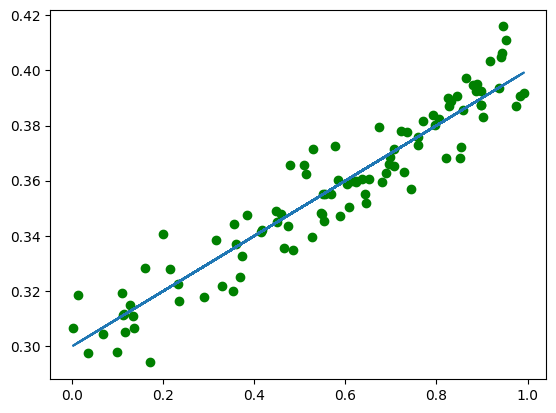

In [269]:
plt.plot(X, Y, 'go')
plt.plot(X, 0.1*X+0.3)

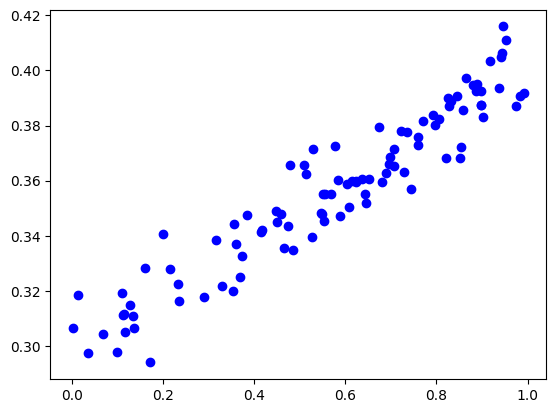

In [270]:
plt.plot(X.numpy(), Y.numpy(), "bo")

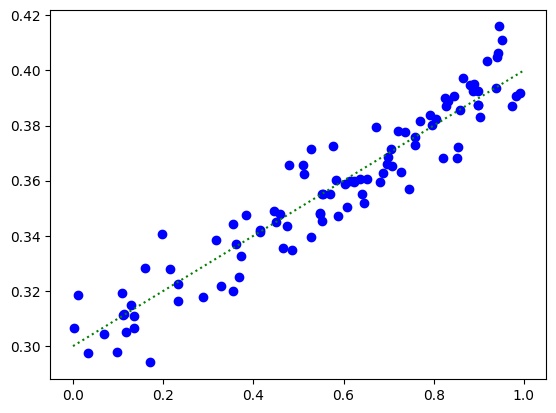

In [271]:
w = 0.1
b = 0.3
plt.plot(X.numpy(), Y.numpy(), "bo")
plt.plot([0, 1], [w*0+b, w*1+b], "g:")  # Show linear regression line according to true w=0.1, b=0.3

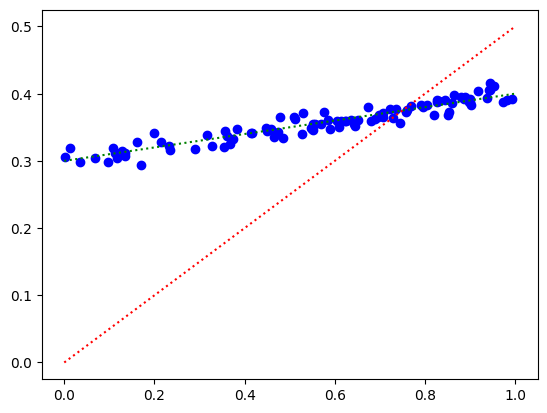

In [272]:
w_guess = 0.5
b_guess = 0.0
plt.plot(X.numpy(), Y.numpy(), "bo")
plt.plot([0, 1], [0.1*0+0.3, 0.1*1+0.3], "g:") 
plt.plot([0, 1], [0*w_guess+b_guess, 1*w_guess+b_guess], "r:")
plt.show()


The problem we are trying to solve is funding the correlation, fitting the red line to our green line.
Getting the red line to fit the optimal solution (the green line point)

We need to find the distance between our red line and the green line. We need to find our error - how far are we from correct answer.

In [273]:
def predict(x, w=w, b=b):
    y = w * x + b
    return y

Finding the loss (distance between the line and a point).

Find distance between prediction of Y and true value of Y

In [274]:
def mean_squared_error(y_pred, Y):
    return tf.reduce_mean(tf.square(y_pred - Y))

In [275]:
print(mean_squared_error(predict(X), Y))

tf.Tensor(8.431363e-05, shape=(), dtype=float32)


The loss is significant `0.12194605` 

In [276]:
w_guess = 0.1
b_guess = 0.3
print(mean_squared_error(predict(X), Y))    


tf.Tensor(8.431363e-05, shape=(), dtype=float32)


Matching our original values makes our loss far far lower  `0.00011116295`. We are closer to our ideal solution.

## Minimising the loss function

We *could* do this by hand, changing the weights and biases, twiddling them ourselves...however that would take forever! So we need an automatic solution with `differentiation`

We define the `learning_rate`. We want our steps to be quite small to prevent overshooting the `Gradient Descent` (we want to avoid jumping out of our `local minima`).

This will be an iterative method to get us close as we can.
- Calculate current loss function
- Decide what direction to move
- Move in that direction

`GradientTape()` is a Tensorflow operation where TF keeps track of mathematical operations

step 0 loss 1.841741919517517


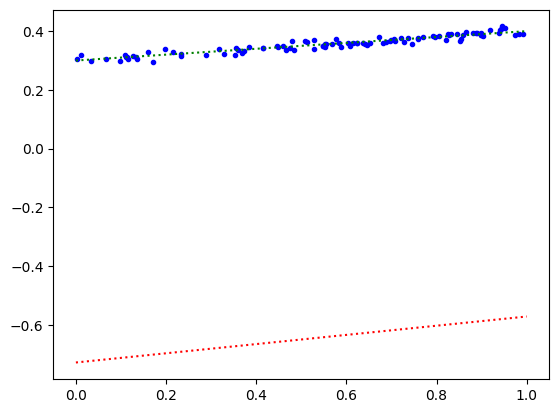

step 20 loss 0.012263456359505653


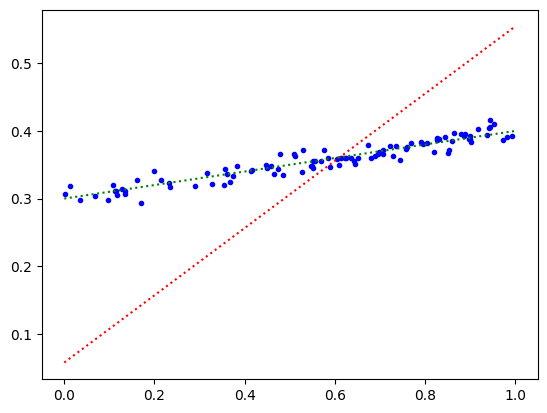

step 40 loss 0.0078764408826828


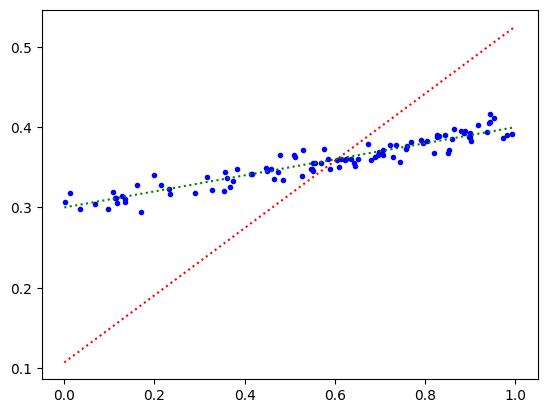

step 60 loss 0.00507228123024106


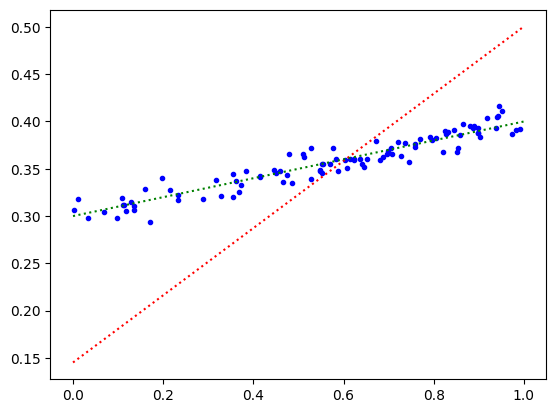

step 80 loss 0.003277217037975788


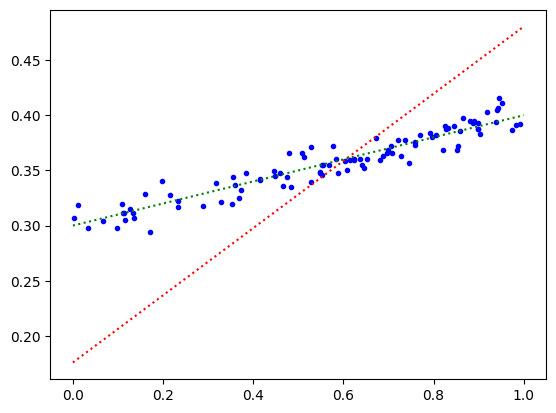

step 100 loss 0.0021281202789396048


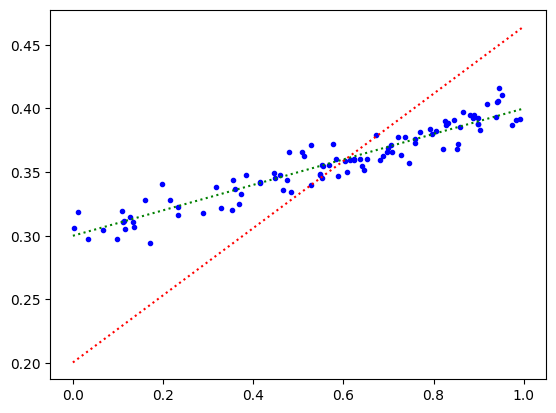

step 120 loss 0.001392532605677843


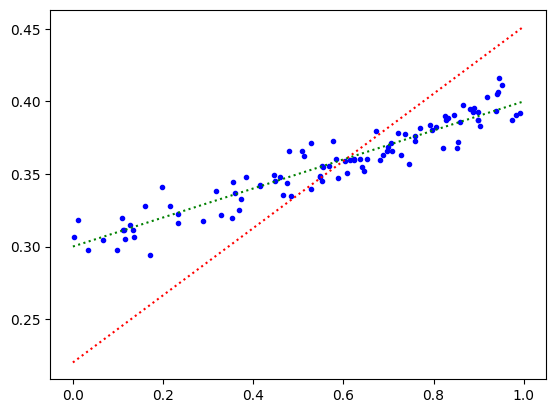

step 140 loss 0.0009216518956236541


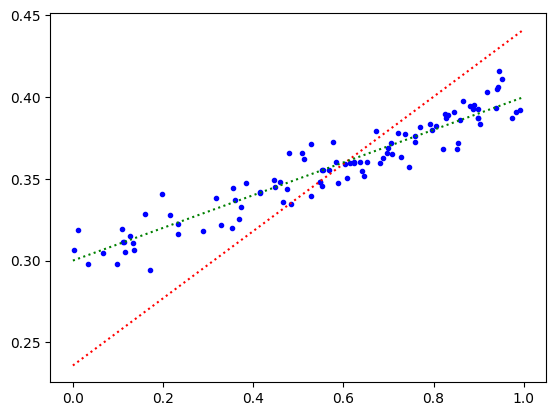

step 160 loss 0.0006202204385772347


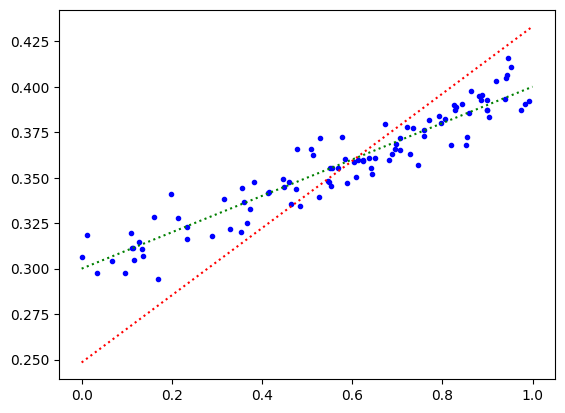

step 180 loss 0.00042726114043034613


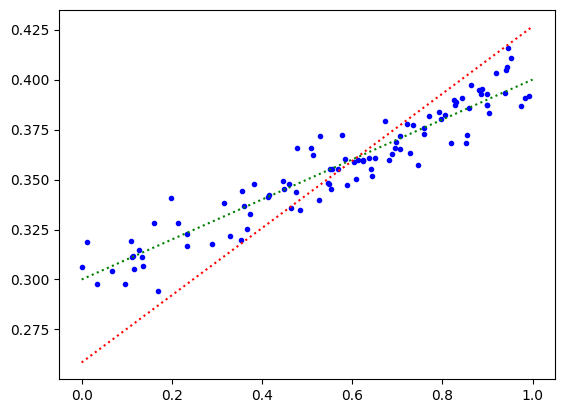

step 200 loss 0.000303739623632282


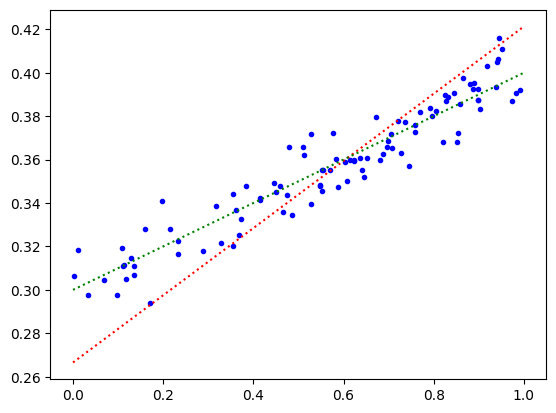

step 220 loss 0.0002246685908176005


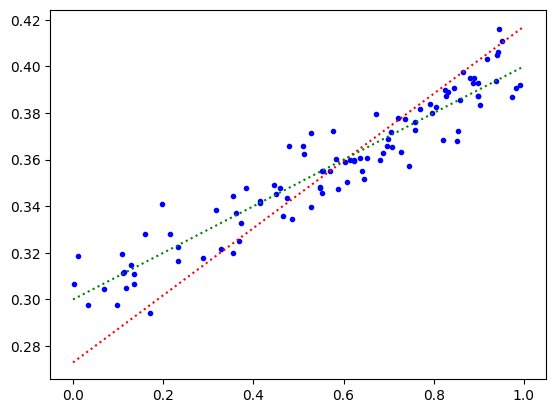

step 240 loss 0.0001740514999255538


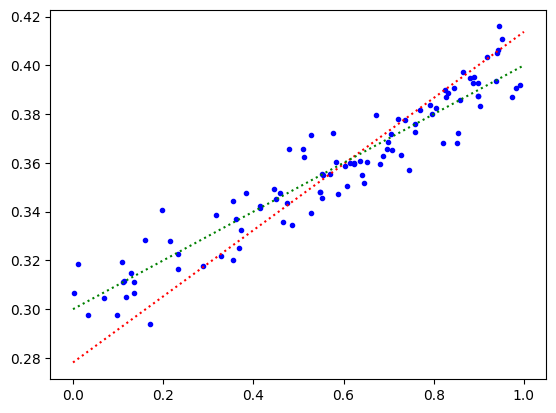

step 260 loss 0.00014164957974571735


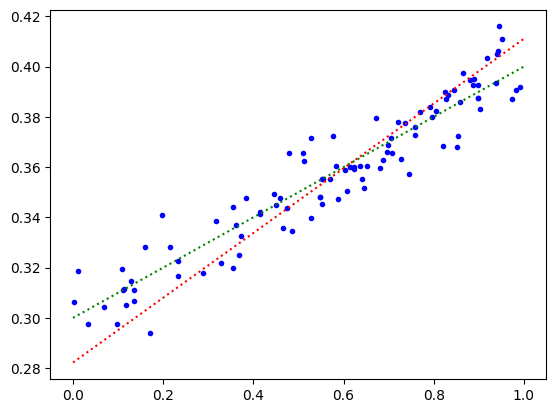

step 280 loss 0.00012090738164260983


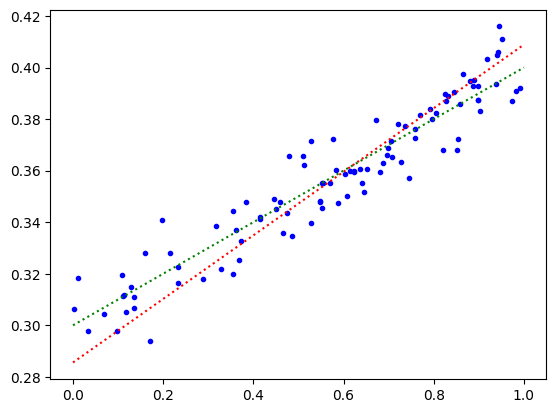

step 300 loss 0.00010762966849142686


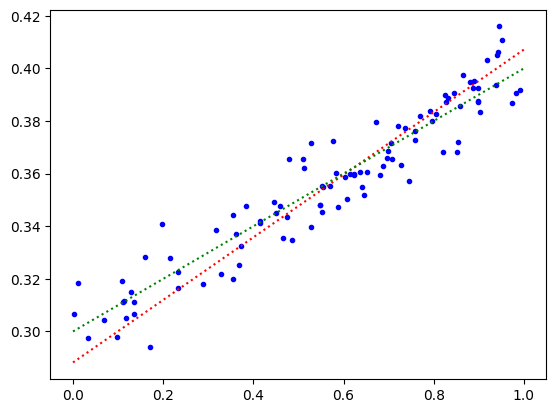

step 320 loss 9.912990208249539e-05


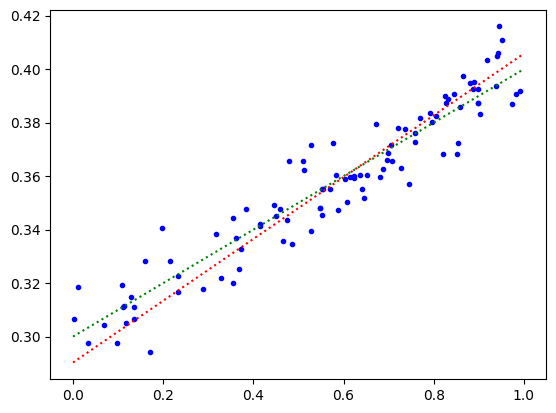

step 340 loss 9.368886821903288e-05


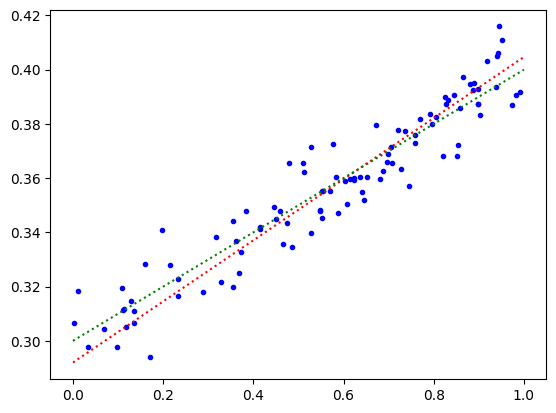

step 360 loss 9.020586730912328e-05


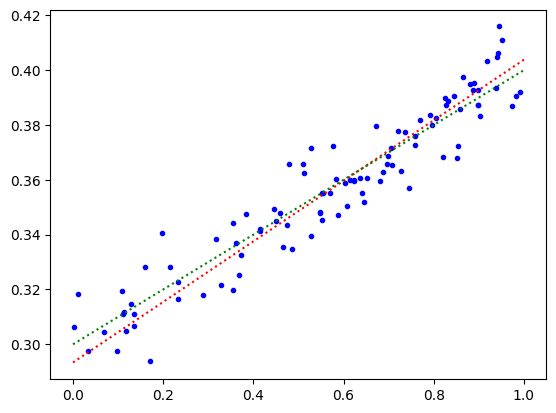

step 380 loss 8.797615737421438e-05


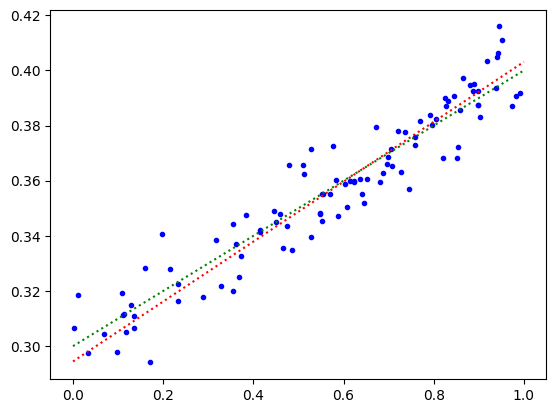

In [288]:
learning_rate = 0.1
steps = 400

w_true = 0.1
b_true = 0.3

w = tf.Variable(0.0)
b = tf.Variable(-1.0)

for step in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X, w=w, b=b)
        # comparing our predictions to the true Y values
        # Calculate current loss function
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b]) # list of variables to modify
    # modify the weights
    # print(gradients[0])
    # print(gradients[0] * learning_rate)
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
    # Decide what direction to move
    # Move in that direction
    if step % 20 == 0:
        print(f"step {step} loss {loss.numpy()}") 
   
        plt.plot(X, Y, "b.")
        plt.plot([0, 1], [0*w+b, 1*w+b], "r:") 
        plt.plot([0, 1], [0*w_true+b_true, 1*w_true+b_true], "g:")
        plt.show()  

In [278]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=0.006039425265043974>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.00365498848259449>]

In [279]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.15535157918930054>

In [280]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.266182005405426>

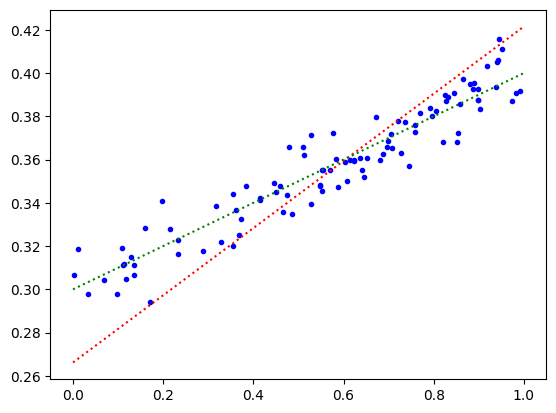

In [281]:
w_true = 0.1
b_true = 0.3
plt.plot(X, Y, "b.")
plt.plot([0, 1], [0*w+b, 1*w+b], "r:") 
plt.plot([0, 1], [0*w_true+b_true, 1*w_true+b_true], "g:")
plt.show()